<div style="background-color:#F0BC42;padding:10px;border-radius:24px;text-align:center;font-size:200%;">
    <h1><b> <font color='#8E1F2F'> Bank Customer Churn Prediction Project </font></b></h1>

<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 1 |</span><span style='color:#ff6200'>Probelm Statement</span></b>

<h2><P>The aim of this project to analyze the bank customer's demographics and financial
information which inculdes customer's age, gender. country, credit score, balance and
many others to predict whether the customer will leave the bank or not.</p>
</h2>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:130%; text-align:left">

<h2 align="left"><font color=#ff6200>Dataset Description:</font></h2>

| __Variable__   | __Description__ |
|     :---       |       :---      |      
| __RowNumber__  | RowNumber |
| __CustomerId__  | Unique identification key for different customers. |
| __Surname__| Customer's last name |
| __CreditScore__   | Credit score of the customer |
| __Geography__| Country of the customer |
| __Age__  | Age of the customer |
| __Tenure__ | Number of years for which the customer has been with the bank |
| __Balance__    |  Bank balance of the customer |
| __NumOfProducts__ | Number of bank products the customer is utilising. |
| __HasCrCard__    | Binary flag for whether the customer holds a credit card with the bank or not |
| __IsActiveMember__ | Binary flag for whether the customer is an active member with the bank or not |
| __EstimatedSalary__    | Estimated salary of the customer in Dollars |
| __Exited__    | 1 if the customer closed account with bank and 0 if the customer is retained |    

<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 2 |</span><span style='color:#ff6200'>Importing libraries and Data Exploration</span></b> 

In [1]:
import numpy as np   #for linear algebra
import pandas as pd  #for data importing and data wrangling
import matplotlib.pyplot as plt # for plotting
import seaborn as sns           #for advanced plots 
sns.set() 
plt.style.use('fivethirtyeight')

In [3]:
# reading dataframe 
path=r'C:\Users\aldawlia\Desktop\pORTOFOLIO\churn.csv'
df=pd.read_csv(path)

In [4]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h4> The dataset is composed of of 1000 rows and 13 columns , ten variables are numerical while three are categorical. 

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <span style="color:#552447">There are<b> no missing data</b> </span>
    
    

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <span style="color:#552447">let's explore <b>RowNumber, CustomerId and Surname </b>variables first </span>
    
    


In [758]:
df.RowNumber.describe()

count    10000.00000
mean      5000.50000
std       2886.89568
min          1.00000
25%       2500.75000
50%       5000.50000
75%       7500.25000
max      10000.00000
Name: RowNumber, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <h4>There is no need for <b>RowNumber column</b> as it works as an index for the dataset</h4>

In [762]:
df.CustomerId.describe().round()

count       10000.0
mean     15690941.0
std         71936.0
min      15565701.0
25%      15628528.0
50%      15690738.0
75%      15753234.0
max      15815690.0
Name: CustomerId, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <h4>We have 10,000 distinct customer.</h4>

In [5]:
df.Surname.sample(10)

5333         Huang
5165        Campos
1289        Amechi
7604            Fu
8817     Udegbunam
2506          Feng
9452    Napolitani
4376         Cross
2096       Amaechi
2109         Moore
Name: Surname, dtype: object

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <h4> We wont analyze Surname columns ,as It wont be useful for predicted churned customer. </h4> 
    

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <h4>We will drop those three variables as they can't help use with our objective of prediction.</h4>

In [6]:
# droping RowNumber column
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h4>We have a clean dataset and we are ready for Explorary Data Analysis </h4>

<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 2 | </span><span style='color:#ff6200'>Exploratory Data Analysis</span></b> 

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <h4>Let's explore each variable and see if it can help us predict the target , but first lets analyze the target variable namely exited column </h4>


# <span style='color:#ff6200'>1-Exploring Exited variable</span></b> 

In [7]:
df.groupby(['Exited'])['Exited'].size()/len(df)*100

Exited
0    79.63
1    20.37
Name: Exited, dtype: float64

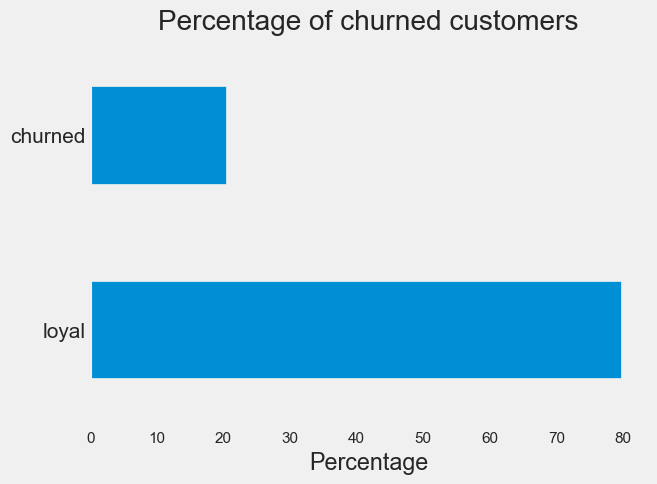

In [8]:
(df.Exited.value_counts(normalize=True)*100).plot(kind='barh')
plt.yticks([1,0],['churned','loyal'],fontsize=15)
plt.xlabel('Percentage')
plt.title('Percentage of churned customers');
plt.grid(False)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
<h4>We have around 80% loyal Customers while 20% churned. </h4>

# <span style='color:#ff6200'>2- Exploring CreditScore variable</span></b> 

In [8]:
df.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

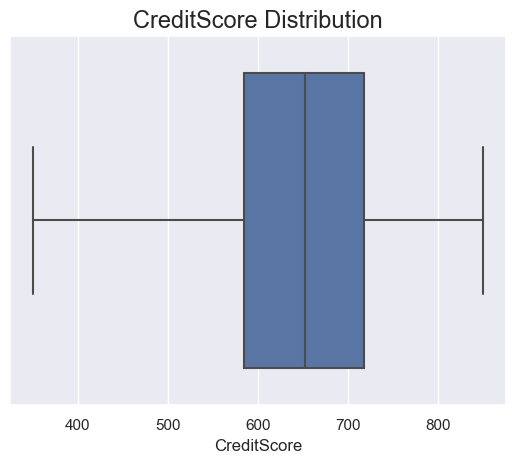

In [585]:
sns.boxplot(x=df['CreditScore'],whis=1.75)
plt.title('CreditScore Distribution',fontsize=17);

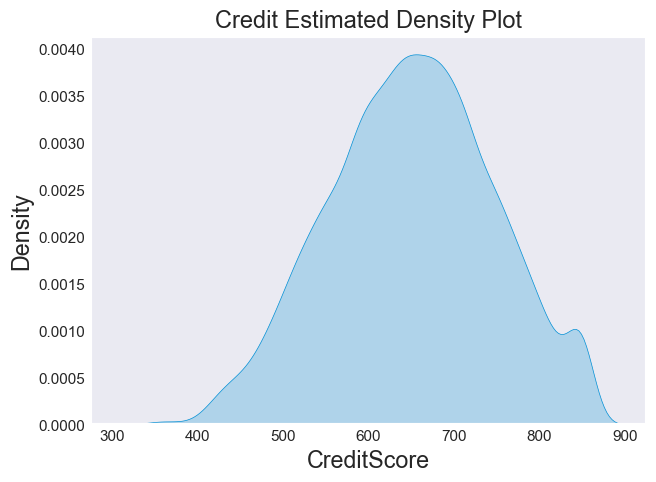

In [16]:
sns.set_style('dark')
sns.kdeplot(x=df['CreditScore'],fill=True)
plt.title('Credit Estimated Density Plot',fontsize=17);

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* Distribtion of Credit Score is approximately normal</b><br>Let's see if there is a difference between churned and loyal as to this variable

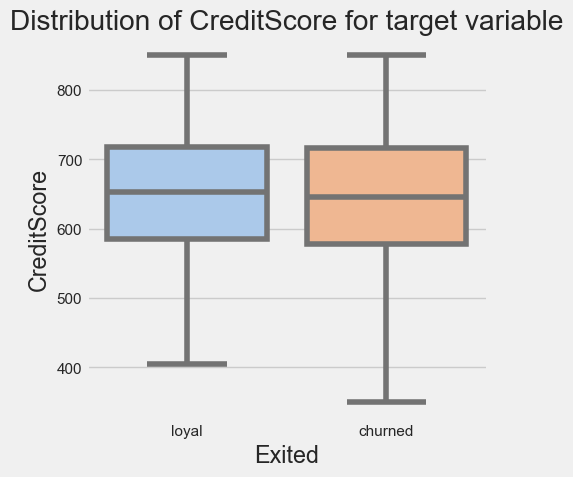

In [992]:
sns.catplot(data=df,y='CreditScore',x='Exited',kind='box',whis=1.8,palette='pastel')
plt.title('Distribution of CreditScore for target variable')
plt.xticks([0,1],['loyal','churned']);
plt.tight_layout()

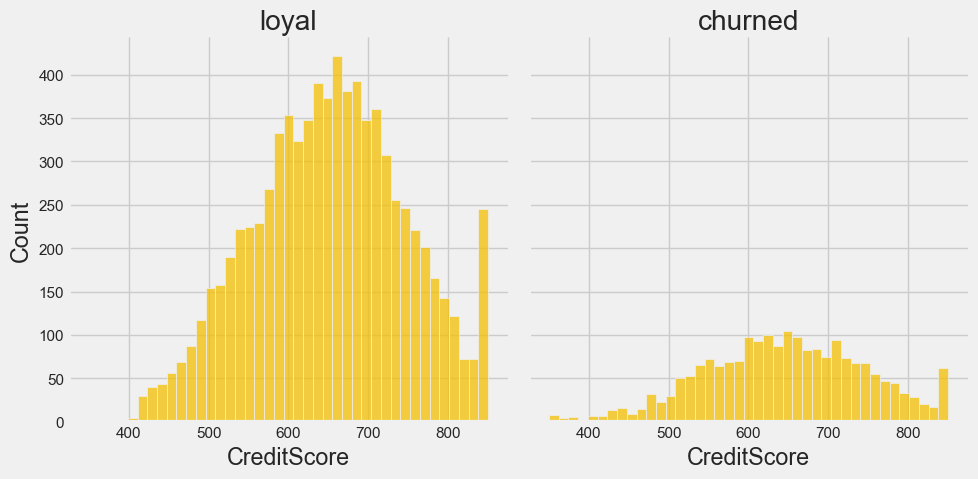

In [15]:
g=sns.displot(data=df,x='CreditScore',col='Exited',color='xkcd:golden')
axes=g.axes.flatten()
axes[0].set_title('loyal')
axes[1].set_title('churned');

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* it seems CustomerScore median is the same for both </b>

# <span style='color:#ff6200'>3- Exploring Geography variable</span></b> 

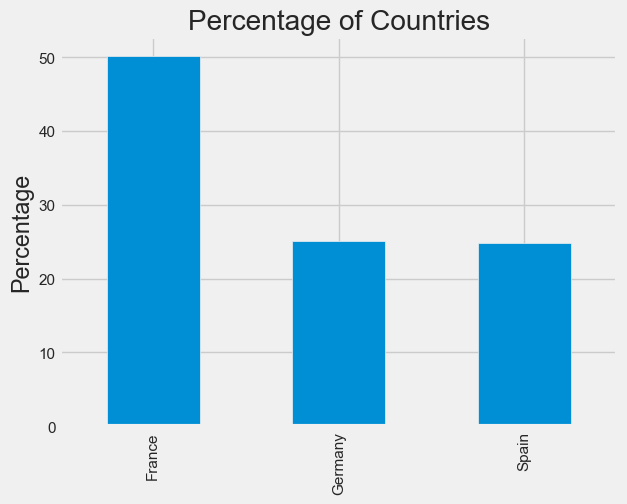

In [993]:
df.Geography.value_counts(normalize=True).mul(100).plot(kind='bar')
plt.ylabel('Percentage')
plt.title('Percentage of Countries')
plt.show();

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* About 50 % of all customers are from France and the rest is evenly split between Germany and Spain </b>
 

In [617]:
percentage=df[['Geography','Exited']].groupby(['Geography']).value_counts(normalize=True).mul(100).reset_index()

In [618]:
percentage.rename(columns={0:'percentage'},inplace=True)

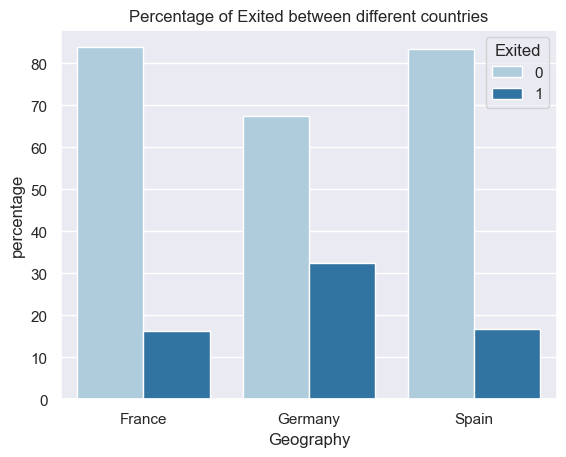

In [645]:
sns.barplot(data=percentage,x='Geography',y='percentage',estimator=np.sum,hue='Exited',palette='Paired')
plt.title('Percentage of Exited between different countries');

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* Germany has the highest churn percentage at around 30 percent followed by evenly Spain and France at about 17 percent  </b>
 

# <span style='color:#ff6200'>4- Exploring Gender variable</span></b> 

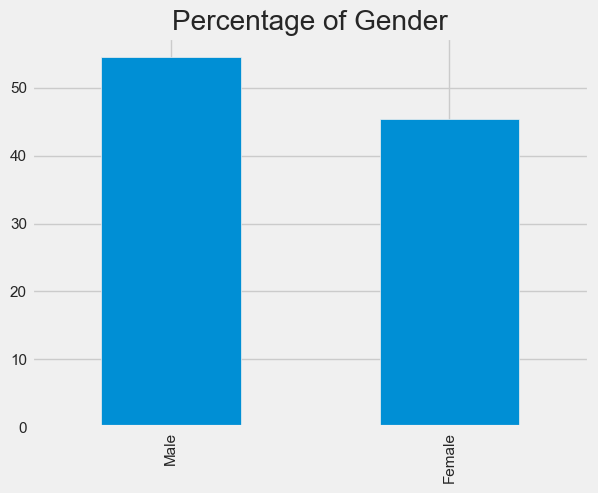

In [994]:
df.Gender.value_counts(normalize=True).mul(100).plot(kind='bar')
plt.title('Percentage of Gender');

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* Over 50 % of all customers are men  </b>
 

In [152]:
gend_per=df[['Gender','Exited']].groupby(['Gender']).value_counts(normalize=True).mul(100).reset_index()

In [155]:
gend_per.rename(columns={0:'Percentage'},inplace=True)

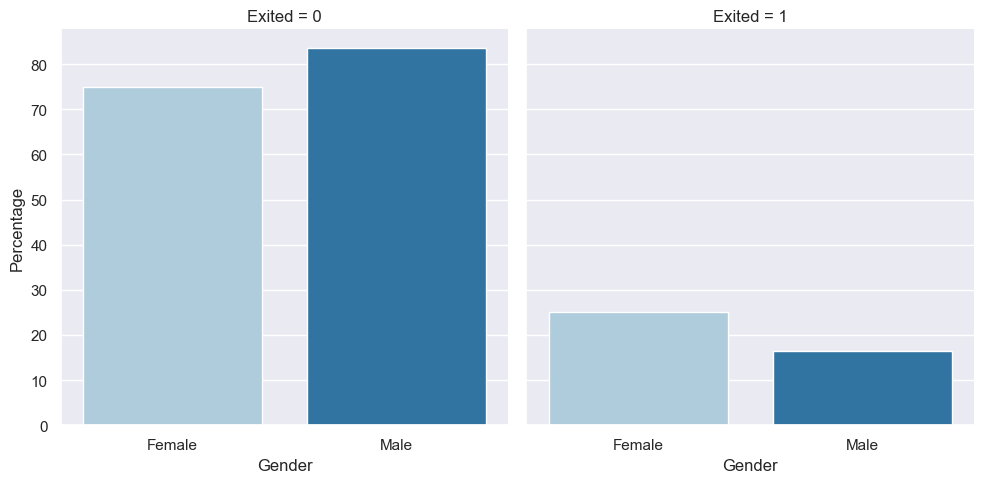

In [694]:
sns.catplot(data=gend_per,x='Gender',y='Percentage',col='Exited',palette='Paired',kind='bar')
 

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* There is a higher percentage among women who churned ; 25 % percent churned while only 16 percent of Men did</b>
 

# <span style='color:#ff6200'>5- Exploring Age variable</span></b> 

In [164]:
df.Age.describe()

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Age Distribution')

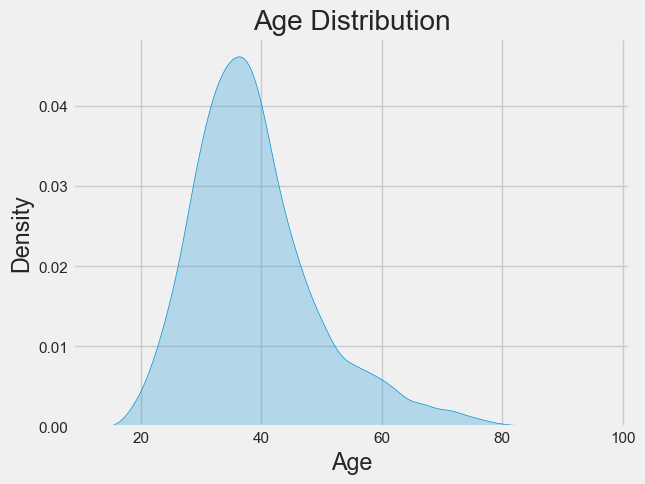

In [1004]:
sns.kdeplot(df.Age,fill=True)
plt.title('Age Distribution')

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* Age is slightly skewed to the right </b>
 
 

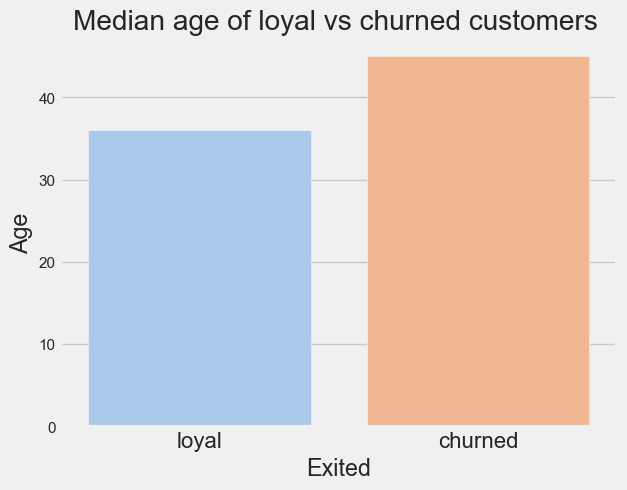

In [1002]:
sns.barplot(data=df,x='Exited',y='Age',errorbar=None ,estimator=np.median,palette='pastel' )
plt.xticks([0,1],['loyal','churned'],fontsize=16)
plt.title('Median age of loyal vs churned customers ');

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* The Median age of churned is higher than that of loyal  </b>

Text(0.5, 1.0, 'Histogram of Age distribution')

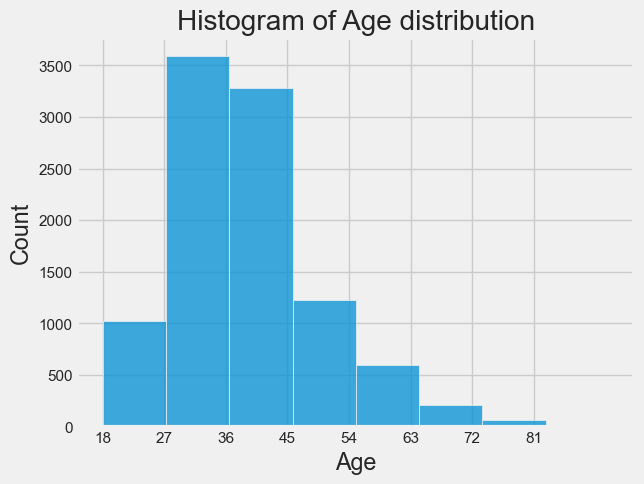

In [1005]:
sns.histplot(df.Age,bins=8)
plt.xticks(ticks=range(18,90,9));
plt.title('Histogram of Age distribution')

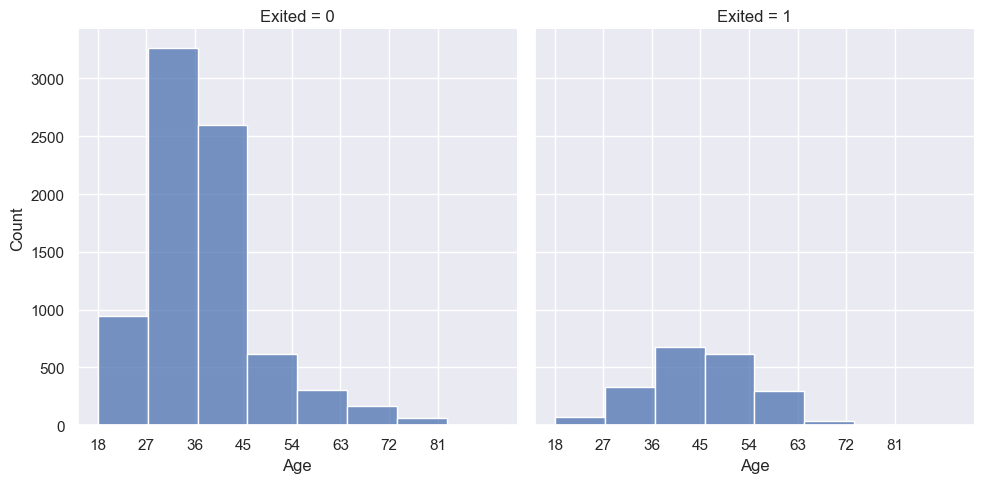

In [221]:
sns.displot(data=df,x='Age',bins=8,col='Exited')

plt.xticks(ticks=range(18,90,9));

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>*The age range for loyal customers is higher ; maybe given there are constitiute the majority in the dataset, 
 almost all customers from 18 to 27 are loyal  </b>


# <span style='color:#ff6200'>6- Exploring Tenure variable</span></b> 

In [804]:
df.Tenure.value_counts().sort_index()

0      413
1     1035
2     1048
3     1009
4      989
5     1012
6      967
7     1028
8     1025
9      984
10     490
Name: Tenure, dtype: int64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* The least customers haven't completed one year or those who completed tenure of ten years </b>


In [195]:
df.Tenure.describe()

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

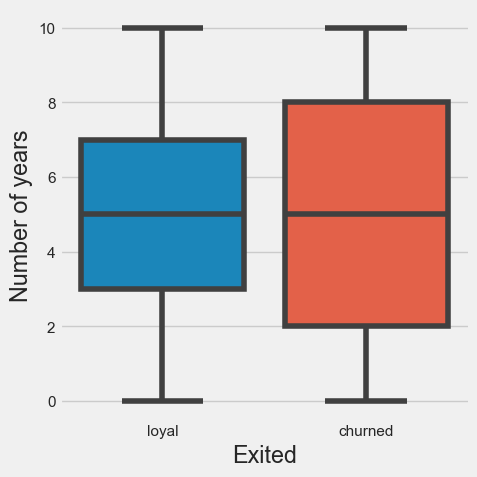

In [1009]:
sns.catplot(data=df,x='Exited',y='Tenure',kind='box')
plt.xticks([0,1],['loyal','churned']); 
plt.ylabel('Number of years');

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* There is a wider range at churned customers as to number of years  </b>

 

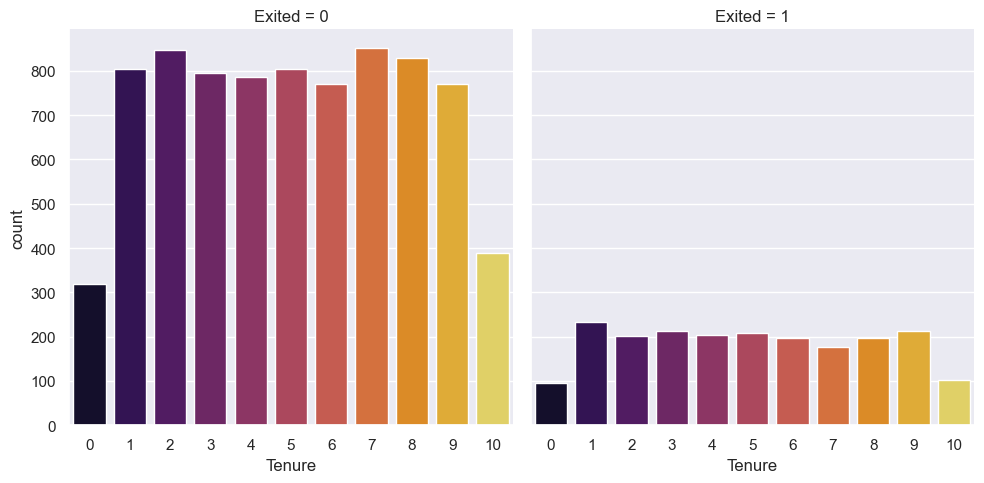

In [810]:
sns.catplot(data=df,x='Tenure',kind='count',palette='inferno',col='Exited')

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* the tenure seems almost the same for both but while 2 and 7 years are the most common among loyal customers  ,1 and 9 are most common among churned customers  </b>


# <span style='color:#ff6200'>7- Exploring Balance variable</span></b> 

In [812]:
df.Balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

Text(0.5, 1.0, 'Balance distribution among customers')

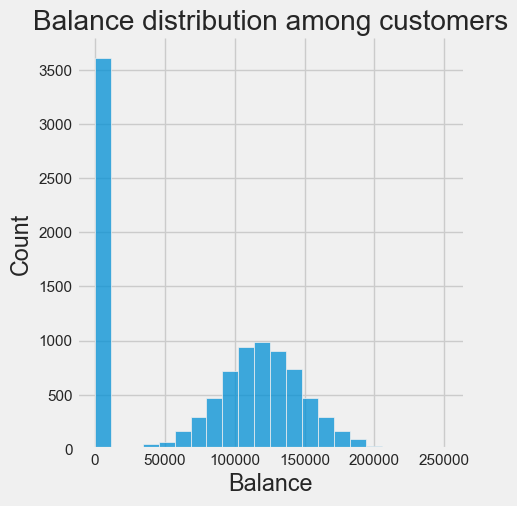

In [1010]:
sns.displot(data=df,x='Balance')
plt.title('Balance distribution among customers')

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* The distribution of balance variable shows a peak at zero peak and a normal distribution around 120,000 </b>


Text(0.5, 1.0, 'Balance distribution among loyal vs churned ')

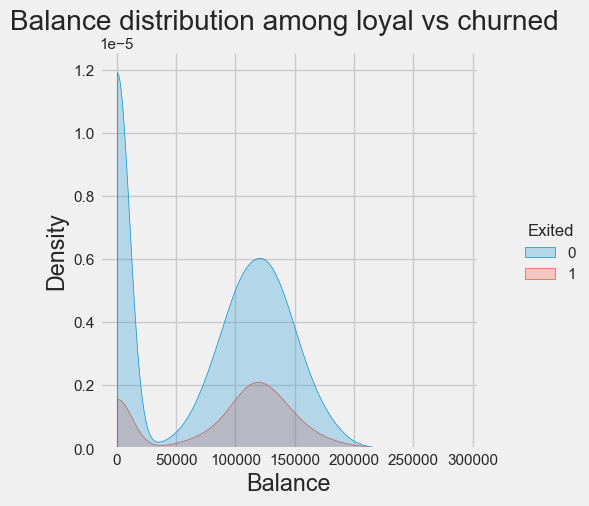

In [1014]:
sns.displot(data=df,x='Balance',hue='Exited',kind='kde',clip=[0,np.inf],fill=True)
plt.title('Balance distribution among loyal vs churned ')


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>*Let's explore those customers with zero balance  </b>


In [702]:
df.query('Balance==0').shape[0]/len(df)*100

36.17

In [819]:
df.query('Balance==0').groupby(['Exited']).size()/3617*100


Exited
0    86.176389
1    13.823611
dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* 36 percent of dataset customers have zero balance and 14% of them churned  </b>

 


# <span style='color:#ff6200'>8- Exploring NumOfProducts variable</span></b> 

In [849]:
df.NumOfProducts.value_counts(normalize=True)*100

1    50.84
2    45.90
3     2.66
4     0.60
Name: NumOfProducts, dtype: float64

In [851]:
#ppl can have one to four items ; most are having one or two
df.NumOfProducts.describe()

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

Text(0.5, 1.0, 'ecdf plot for number of products')

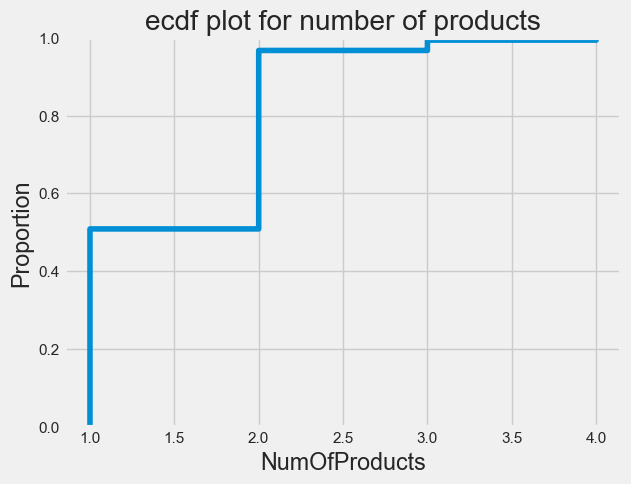

In [1015]:
sns.ecdfplot(df.NumOfProducts)
plt.title('ecdf plot for number of products')

Text(0.5, 1.0, 'Bar plot for number of products')

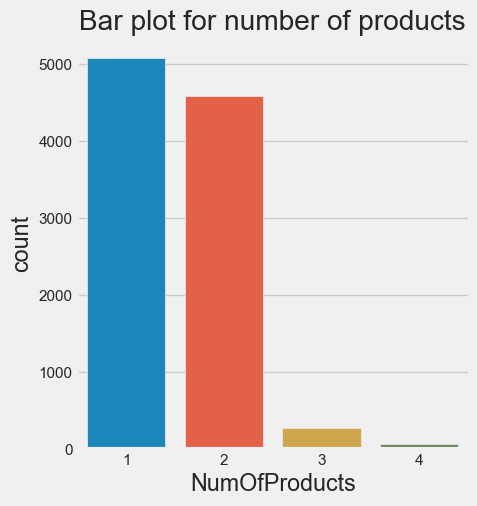

In [1016]:

sns.catplot(data=df,x='NumOfProducts',kind='count')
plt.title('Bar plot for number of products')

In [854]:
products=(df.groupby(['Exited'])['NumOfProducts'].value_counts(normalize=True).mul(100)).reset_index(name='percentages')

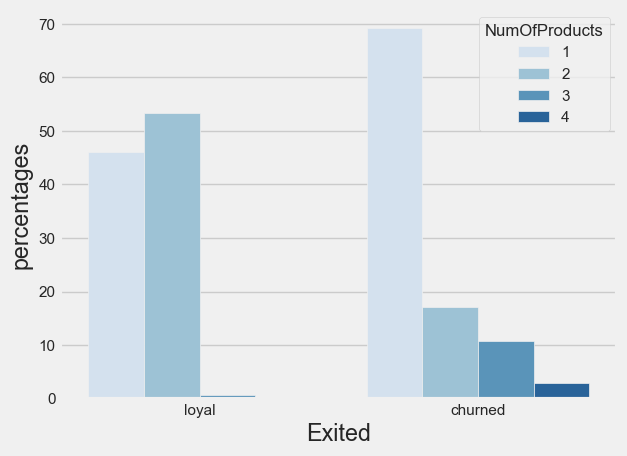

In [1018]:
sns.barplot(data=products,x='Exited',y='percentages',hue='NumOfProducts',palette='Blues')
plt.xticks(ticks=[0,1],labels=['loyal','churned']);

# <span style='color:#ff6200'>9- Exploring HasCrCard variable</span></b> 

In [705]:
df.HasCrCard.value_counts(normalize=True)*100

1    70.55
0    29.45
Name: HasCrCard, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* about 70% of dataset customers have had credit card  </b>

 


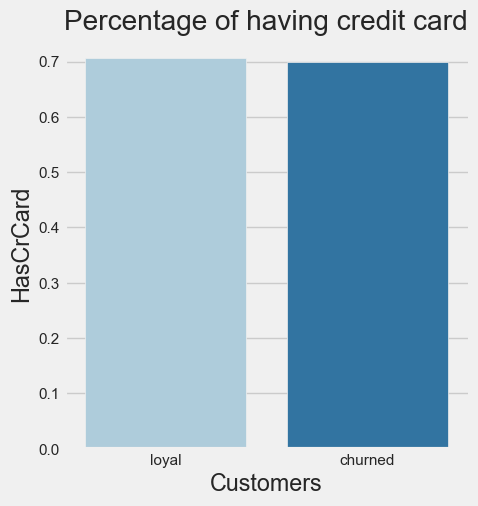

In [1027]:
sns.catplot(data=df,x='Exited',y='HasCrCard',kind='bar',estimator=np.mean,palette='Paired',errorbar=None)
plt.xticks([1,0],['churned','loyal']);
plt.title('Percentage of having credit card');
plt.xlabel('Customers');

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* There is no difference in percentage of holding a credit card among churned and returned customers   </b>

 


# <span style='color:#ff6200'>10- Exploring IsActiveMember variable</span></b> 

In [712]:
df.IsActiveMember.value_counts(normalize=True)*100

1    51.51
0    48.49
Name: IsActiveMember, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* Around 52 % of dataset customers are active members   </b>

In [841]:
df.groupby(['Exited'])['IsActiveMember'].value_counts(normalize=True).mul(100).unstack().rename(columns={0:'Inactive',1:'Active'},index={0:'returned',1:'churned'})

IsActiveMember,Inactive,Active
Exited,,
returned,44.543514,55.456486
churned,63.917526,36.082474


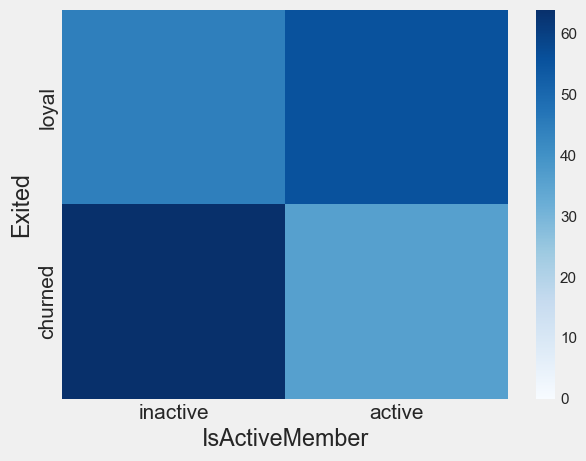

In [1033]:
sns.heatmap(df.groupby(['Exited'])['IsActiveMember'].value_counts(normalize=True).mul(100).unstack(),vmin=0,cmap='Blues')
plt.xticks([.5,1.5],['inactive','active'],fontsize=15)
plt.yticks([.5,1.5],['loyal','churned'],fontsize=15);

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* Above 60 percent of churned werenot active member and it makes sense </b>
 

# <span style='color:#ff6200'>11- Exploring EstimatedSalary variable</span></b> 

In [366]:
df.EstimatedSalary.describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

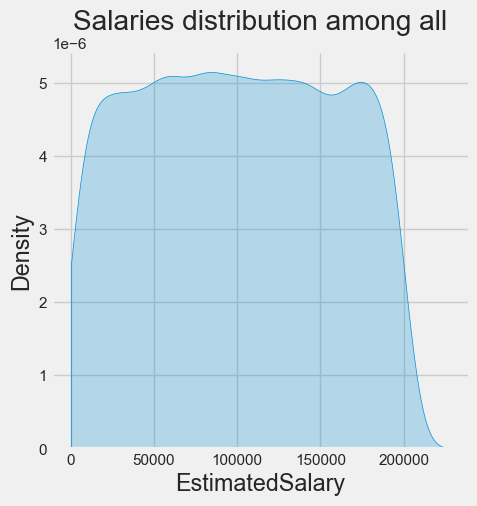

In [1036]:
sns.displot(data=df,x='EstimatedSalary',kind='kde',clip=[0,np.inf],fill=True)
plt.title('Salaries distribution among all');


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* This is a uniform distribution </b>
 

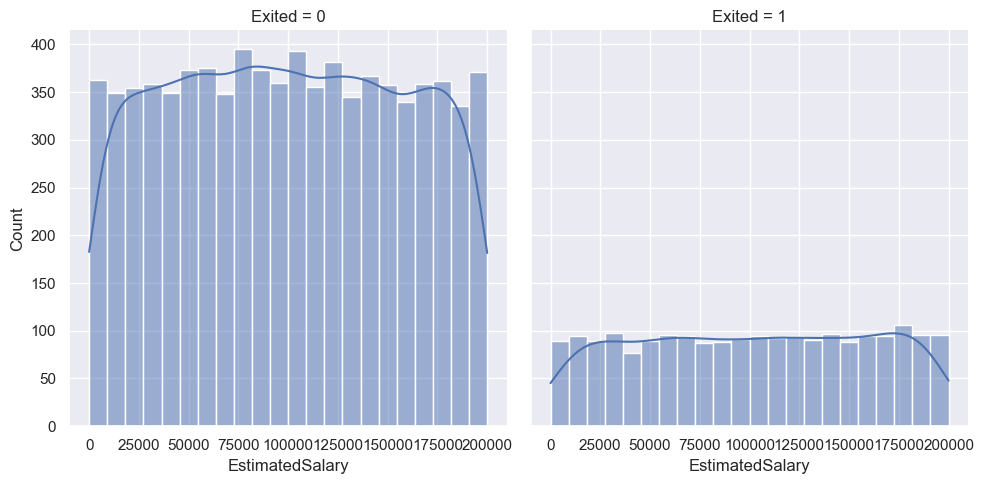

In [751]:
sns.displot(data=df,x='EstimatedSalary',col='Exited',kde=True)

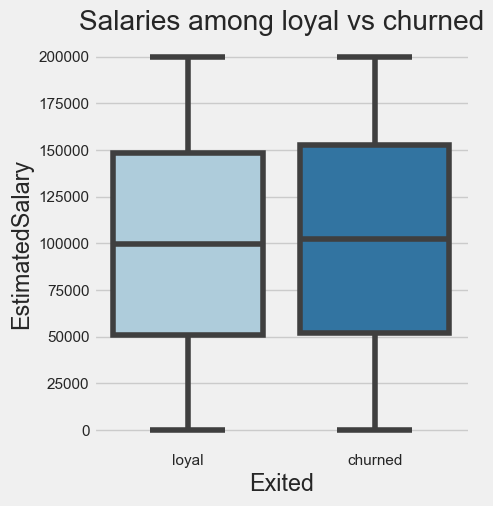

In [1040]:
sns.catplot(data=df,x='Exited',y='EstimatedSalary',kind='box',palette='Paired')
plt.xticks([0,1],['loyal','churned']);
plt.title('Salaries among loyal vs churned');

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* There is no difference between median of both groups </b>
 

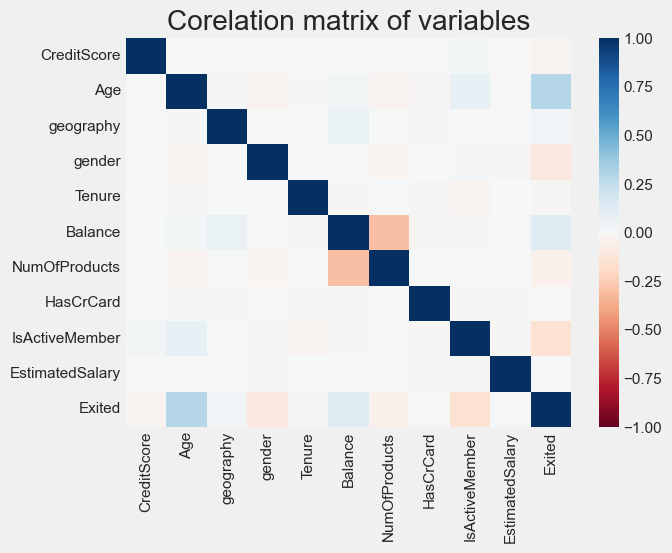

In [1210]:
sns.heatmap(df.corr(numeric_only=True),cmap='RdBu',vmin=-1,vmax=1);
plt.title('Corelation matrix of variables');
   

In [1221]:
df.corr()['Balance']

CreditScore        0.006268
Age                0.028308
geography          0.069408
gender             0.012087
Tenure            -0.012254
Balance            1.000000
NumOfProducts     -0.304180
HasCrCard         -0.014858
IsActiveMember    -0.010084
EstimatedSalary    0.012797
Exited             0.118533
Name: Balance, dtype: float64

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* there is a moderate negative correlation between Balance and NumOfProducts</b>
 


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* As to our target variable there is a moderate with age and a weak correlation with Gender ,NumOfProducts,Balance and        IsActiveMember </b>

<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 3 | </span><span style='color:#ff6200'>Data Pre-processing</span></b>

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* We will label-enconde categorical variables so that we can feed into machine learning models  </b>
 

In [1071]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['geography']=encoder.fit_transform(df.Geography)
df['gender']=encoder.fit_transform(df.Gender)

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* Then We will standard-scale numerical variables as most models require a normal distribution and can have comparable scale </b>
 

In [1072]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [1073]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'geography', 'gender'],
      dtype='object')

In [1074]:
df[['CreditScore', 'Age','Balance','EstimatedSalary']]=scaler.fit_transform(df[['CreditScore', 'Age','Balance','EstimatedSalary']])

In [1075]:
df=df[['CreditScore', 'Age','geography', 'gender', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited' ]]

In [1076]:
dm.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,-4.824585e-16,1.000050,-3.109504,-0.688359,0.015222,0.698109,2.063884
Age,10000.0,2.318146e-16,1.000050,-1.994969,-0.660018,-0.183251,0.484225,5.061197
Tenure,10000.0,5.012800e+00,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.0,-6.252776e-17,1.000050,-1.225848,-1.225848,0.331964,0.819920,2.795323
NumOfProducts,10000.0,1.530200e+00,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
HasCrCard,10000.0,7.055000e-01,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
IsActiveMember,10000.0,5.151000e-01,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.0,-2.877698e-17,1.000050,-1.740268,-0.853594,0.001803,0.857243,1.737200
geography,10000.0,7.463000e-01,0.827529,0.000000,0.000000,0.000000,1.000000,2.000000
gender,10000.0,5.457000e-01,0.497932,0.000000,0.000000,1.000000,1.000000,1.000000


<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* We will split dataset into features and target</b>
 

In [1077]:
x=dm.iloc[:,0:-1]
y=dm.iloc[:,-1]

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* We will use RandomForest classifier model to learn about feature importances in predicting </b>
 

In [1094]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
x_train , x_test , y_train, y_test =train_test_split(x,y)
model=RandomForestClassifier()
model.fit(x_train,y_train)


RandomForestClassifier()

In [1088]:
y_model=model.predict(x_test)

In [1126]:
feauture=pd.DataFrame(index=model.feature_names_in_,data=model.feature_importances_,columns=['Importance'])

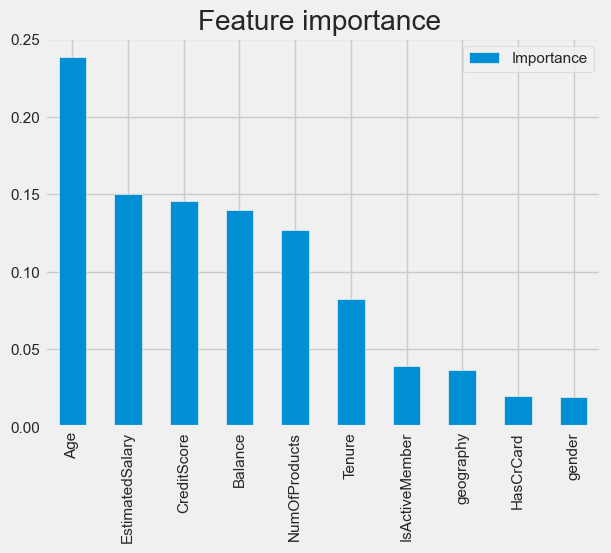

In [1127]:
feauture.sort_values(by='Importance',ascending=False).plot(kind='bar')
plt.title('Feature importance ');

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* We see that Age is by far the most important variable in helping us predict churned customer then comes EstimatedSalary , CreditScore ,Balance,NumberOfProducts  </b>
 

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* We will use PCA so that we reduce feature number and enusre resulting variables are independant</b>
 

In [1128]:
from sklearn.decomposition import PCA

In [1129]:
pca=PCA()

In [1130]:
pca.fit(x)

PCA()

In [1131]:
pca.explained_variance_

array([8.36547895, 1.07039044, 1.00654041, 1.00141669, 0.97866782,
       0.67642622, 0.2934501 , 0.25363438, 0.24036847, 0.20734957])

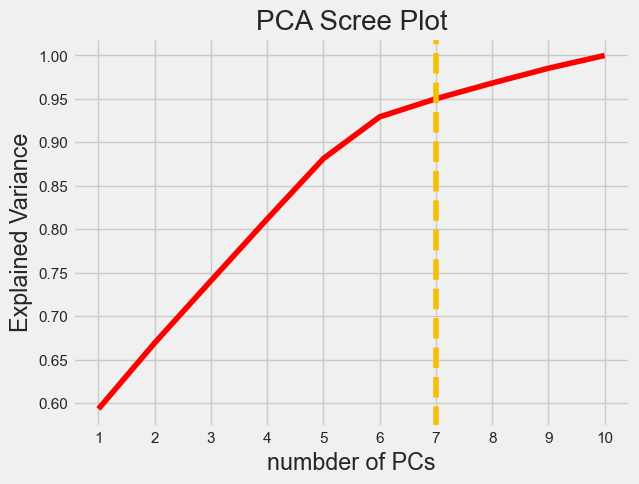

In [1134]:
plt.style.use('fivethirtyeight')
plt.plot(np.cumsum(pca.explained_variance_ratio_),color='red')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],labels=[1,2,3,4,5,6,7,8,9,10]);
plt.xlabel('numbder of PCs')
plt.ylabel('Explained Variance')
plt.axvline(x=6, color='xkcd:golden', linestyle='--') 
plt.title('PCA Scree Plot',fontsize=20);

<div style="border-radius:10px; padding: 15px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* We will use seven Principal Components as they explain about 95% of variation</b>
 


In [1135]:
pca=PCA(n_components=7)

In [1136]:
df_pca=pca.fit_transform(x)

In [1137]:
new_df=pd.DataFrame(df_pca,columns=['pc'+str(x) for x in range(1,8)])

<a id="libraries"></a>
# <b><span style='color:#fcc36d'>Step 4 | </span><span style='color:#ff6200'>Model and Evaluation</span></b>


<div style="border-radius:15px; padding: 10px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* Now We will split dataset into training and testing sets </b>
 


In [1138]:
from sklearn.model_selection import train_test_split

In [1139]:
x_train,x_test,y_train,y_test=train_test_split(new_df,y)

<div style="border-radius:15px; padding: 10px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* We will implement Logistic Regression model and evaluate it  </b>
 


In [1140]:
from sklearn.linear_model import LogisticRegression

In [1141]:
logistic=LogisticRegression()

In [1142]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [1147]:
y_logistic=logistic.predict(x_test)

In [1148]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [1159]:
print('Logistic regression model','\n','accuracy_score:',accuracy_score(y_test,y_logistic)*100,)
print(classification_report(y_test,y_logistic))

Logistic regression model 
 accuracy_score: 78.44
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      1998
           1       0.32      0.06      0.11       502

    accuracy                           0.78      2500
   macro avg       0.56      0.51      0.49      2500
weighted avg       0.71      0.78      0.72      2500



In [1168]:
confusion=confusion_matrix(y_test,y_logistic)
print('TP :' , confusion[1, 1],'\n'
'TN :' , confusion[0, 0],'\n'
'FP :' , confusion[0, 1],'\n'
'FN :' , confusion[1, 0])

TP : 32 
TN : 1929 
FP : 69 
FN : 470


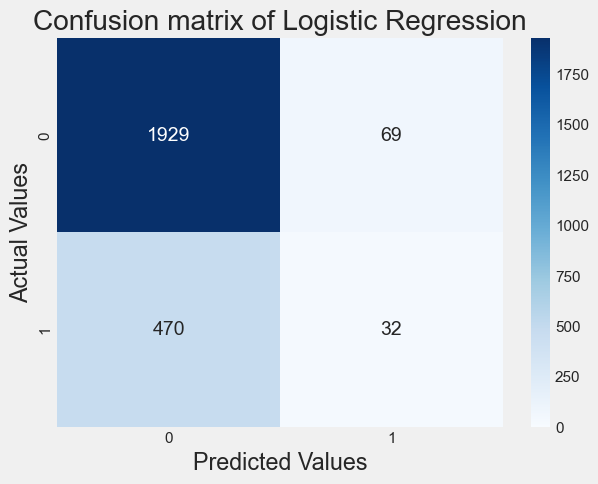

In [1187]:
sns.heatmap(confusion_matrix(y_test,y_logistic),vmin=0,cmap='Blues',annot=True,fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion matrix of Logistic Regression');

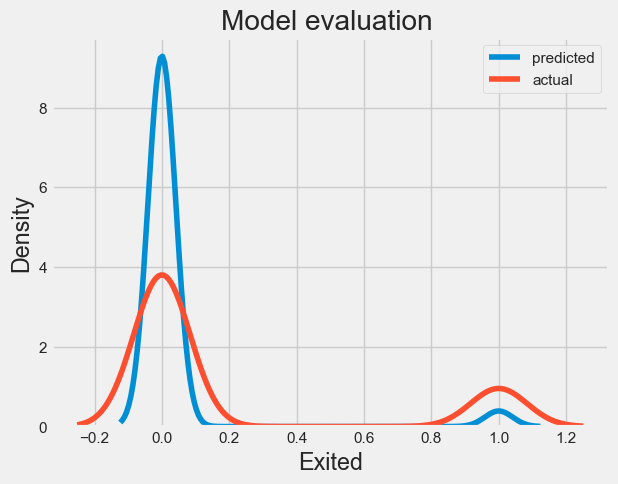

In [1175]:
ax=sns.kdeplot(y_logistic,label='predicted')
sns.kdeplot(y_test,ax=ax,label='actual')
plt.title('Model evaluation ')
plt.legend();

<div style="border-radius:15px; padding: 10px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* It seems Logistic Regression isnot performing very well  </b>
 


<div style="border-radius:15px; padding: 10px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* We will implement Random Forest model and evaluate it  </b>
 


In [1178]:
from sklearn.ensemble import RandomForestClassifier

In [1179]:
forest=RandomForestClassifier()

In [1180]:
forest.fit(x_train,y_train)

RandomForestClassifier()

In [1181]:
y_forest=forest.predict(x_test)

In [ ]:
# evaluation 

In [1182]:
print('Random Forest model','\n','accuracy_score:',accuracy_score(y_test,y_forest)*100,)
print(classification_report(y_test,y_forest))

Random Forest model 
 accuracy_score: 84.24000000000001
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1998
           1       0.69      0.39      0.50       502

    accuracy                           0.84      2500
   macro avg       0.78      0.67      0.70      2500
weighted avg       0.83      0.84      0.82      2500



In [1188]:
confusion=confusion_matrix(y_test,y_forest)
print('TP :' , confusion[1, 1],'\n'
'TN :' , confusion[0, 0],'\n'
'FP :' , confusion[0, 1],'\n'
'FN :' , confusion[1, 0])

TP : 194 
TN : 1912 
FP : 86 
FN : 308


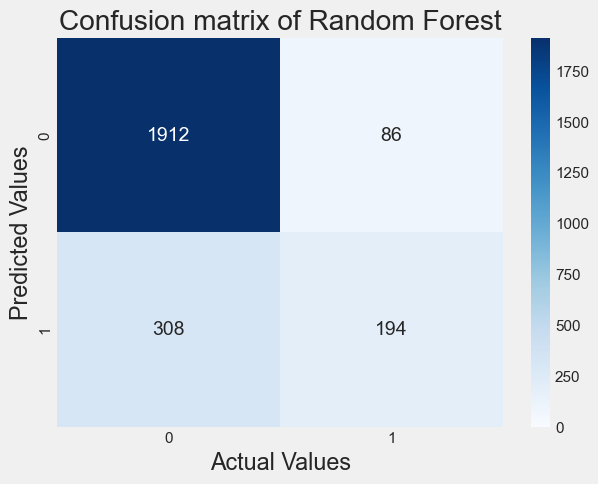

In [1186]:
sns.heatmap(confusion_matrix(y_test,y_forest),vmin=0,cmap='Blues',annot=True,fmt='d')
plt.ylabel('Predicted Values')
plt.xlabel('Actual Values');
plt.title('Confusion matrix of Random Forest');

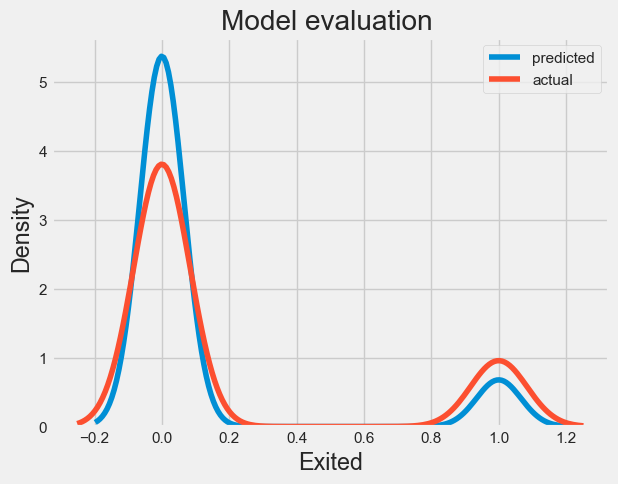

In [1189]:
ax=sns.kdeplot(y_forest,label='predicted')
sns.kdeplot(y_test,ax=ax,label='actual')
plt.title('Model evaluation ')
plt.legend();

<div style="border-radius:15px; padding: 10px; background-color: #ffeacc; font-size:120%; text-align:left">
    <b>* We conclude that Random Forest is suitable for customer churn prediction  </b>
 
